### Overview

At a high level, Gaussian mixture models (GMMs) are a sort of *soft*-clustering. That is, they cluster data such that each data point has a probability associated with its cluster assignment. This allows data points to be associated with multiple clusters through multiple probabilities. It also allows us to quantify a relative measure of the strength of these relationships

A Gaussian Mixture is a function comprised of $K$ Gaussians, where $K$ is *also* the number of clusters in the dataset. So, we model each cluster with its own Gaussian. Each Gaussian $k$ in the mixture has the following parameters:
- A mean $\mu$ that defines its center
- A covariance $\Sigma$ that defines its width
- A mixing probability (aka. mixing coefficient) $0 \le \pi \le 1$
    - The mixing coefficients are specified such that: $$\sum_{k=1}^K \pi_k = 1$$

### General Form of the Gaussian

For a D-dimensional vector $\mathbf{x}$, the multivariate Gaussian distribution takes the form:
$$\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{D/2}}\frac{1}{|\mathbf{\Sigma}|^{1/2}} \exp \bigg\{-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}) \bigg\}$$
Where $\mathbf{\mu}$ is the D-dimensional vector of means and $\mathbf{\Sigma}$ is the DxD covariance matrix

Taking the natural log: 
$$\ln \mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma}) = -\frac{D}{2}\ln 2\pi - \frac{1}{2}\ln \mathbf{\Sigma} - \frac{1}{2}(\mathbf{x} - \mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1} (\bf x - \mu)$$

**NOTE:**\
$\pi$ in the Gaussian density function is the number $\pi$ not the mixing coefficient. It's a bit annoying that the same notation is used for the two.

### General Expression of the Model

The probability that a datum $\mathbf{x}_n$ comes from the Gaussian $k$ is:
$$p(z_{nk} = 1 | \mathbf{x}_n)$$

We may let the mixing coefficient for the $k^{\text{th}}$ Gaussian be the unconditional probability of an observation belonging to that Gaussian:
$$\pi_k = p(z_k = 1)$$

The random variable $z_k$ may be interpreted as a latent Bernoulli random variable which takes the value $1$ with probability $\pi_k$ and $0$ with probability $1 - \pi_k$. The set of all such latent variables (i.e., associated with each cluster assignment) is $Z = \{z_1,...,z_K\}$. 

The conditional probability of observing a datum $\mathbf{x}_n$ given that it came from cluster $k$ is:
$$p(\mathbf{x}_n|z_k = 1) = \mathcal{N}(\mathbf{x}_n | \mathbf{\mu}_k, \mathbf{\Sigma}_k)$$


Then, the unconditional probability of observing the datum $\mathbf{x}_n$ is given by the law of total probability:
$$p(\mathbf{x}_n) = \sum_{k=1}^K p(z_k) \mathcal{N}(\mathbf{x}_n | \mathbf{\mu}_k, \mathbf{\Sigma}_k) = \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}_n | \mathbf{\mu}_k, \mathbf{\Sigma}_k)$$

**Aside**:\
Recall that the law of total probability states that for a set of mutually exclusive and exhaustive events $A=\{a_1, ..., a_N\}$, for any event $b$:
$$p(b) = \sum_{n=1}^N p(b|a_i)p(a_i)$$

**Why This Does Not Contradict the CLT**

The sum of two Gaussian-distributed random variables $X$ and $Y$ is also a Gaussian-distributed random variable. However, the distribution of $p(\mathbf{x}_n)$ in a GMM need not be Gaussian. This is because GMMs sum over the probabilities of realizations of Gaussians, not over the realizations themselves.\
 When adding Gaussians $X$ and $Y$, the probability $p(X+Y)$ follows a Gaussian distribution and may be interpreted as:
> The probability of observing **both** $X=x$ **and** $Y=y$.

 Now, in a GMM with an observable $\mathbf{x}_n$ which is drawn from either Gaussian $z_1$ or Gaussian $z_2$, the probability $p(\mathbf{x}_n)$ follows a mixture distribution comprized of the two possible Gaussian distributions and may be interpreted as: 
 > The probability of observing **either** $\mathbf{x}_n|z_1$ **or** $\mathbf{x}_n|z_2$.

These are fundamentally different probabilities and thus fundamentally different random variables with different distributions.

### Likelihood

The likelihood is the joint probability of all observations $\mathbf{X}$, given by:
$$p(\mathbf{X}) = \prod_{n=1}^N p(\mathbf{x}_n) = \prod_{n=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k, \mathbf{\Sigma}_k)$$
And the log-likelihood is simply:
$$\ln p(\mathbf{X}) = \sum_{n=1}^N \ln \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k, \mathbf{\Sigma}_)$$

### Expectation Maximization

So, how to find the parameters $\pi$, $\bf \mu$, and $\bf \Sigma$? We use a numerical optimization method called expectation maximization (EM). This algorithm alternates between an expectation step, which computes the expected value log-likelihood (of observations and clusters) given parameter estimates, and a maximization step which maimizes the likelihood of this expected value over the parameters.

Let the parameters be the set $\theta = \{\pi, \mathbf{\mu}, \mathbf{\Sigma}\}$.

**Step 1**: Initialize $\theta^*$\
 I don't know whether there is a standard method for the initializations, or whether it would be possible to simply randomly initialize them. I've seen it suggested that you could run K-means clustering first and then compute the initial parameters as the parameters associated with each K-means cluster.

**Step 2**: (**Expectation**) Evaluate expected log-likelihood of the conditional distribution
$$\mathcal{Q}(\theta^*, \theta) = \mathbb{E}\big[\ln p(\mathbf{X}, \ \mathbf{z}|\theta^*)\big] = \sum_\mathbf{z} p(\mathbf{z}|\mathbf{X}, \ \theta) \ln p(\mathbf{X}, \ \mathbf{z}|\theta^*)$$
The conditional probability of a cluster assignment being true, given an observed datum $\mathbf{x}_n$ follows from Baye's theorem as:
$$p(z_k=1|\mathbf{x}_n) = \frac{p(\mathbf{x}_n|z_k)p(z_k)}{p(\mathbf{x})} = \frac{\pi_k \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k, \ \mathbf{\Sigma}_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_j, \ \mathbf{\Sigma}_j)}$$
Which we will denote $\gamma(z_{nk})$.

Now, let's evaluate the second probability term:
$$\ln p(\mathbf{X}, \ \mathbf{z}|\theta^*) = \sum_{n=1}^N \sum_{k=1}^K \big[ \ln \pi_k + \ln\mathcal{N}(\mathbf{x}_n | \mathbf{\mu}_k, \ \mathbf{\Sigma}_k)\big]$$

So, we may express the expectation as:
$$\mathcal{Q}(\theta^*, \theta) = \sum_{\mathbf{z}} \gamma(\mathbf{z})\ln p(\mathbf{X}, \ \mathbf{z}|\theta^*) = \sum_{n=1}^N \sum_{k=1}^K \gamma(z_{nk}) \big[ \ln \pi_k + \ln\mathcal{N}(\mathbf{x}_n | \mathbf{\mu}_k, \ \mathbf{\Sigma}_k)\big]$$

**Step 3**: (**Maximization**) Find $\theta^*$
$$\theta^* = \text{argmax}_\theta \mathcal{Q}(\theta^*, \theta)$$

Now there is one point of nuance here, which is that we need to ensure that the maximization resticts the estimates for the parameter $\pi$ to sum to 1. So, we add a penalty the the $\pi$ terms with a Lagrange multiplier:
$$\mathcal{Q}(\theta^*, \theta) = \sum_{n=1}^N \sum_{k=1}^K \big[ \ln \pi_k + \ln\mathcal{N}(\mathbf{x}_n | \mathbf{\mu}_k, \ \mathbf{\Sigma}_k)\big] - \lambda \bigg(\sum_{k=1}^K \pi_k - 1 \bigg)$$

We may derive optimal parameter estimates by taking the score equations of the formula w.r.t. each parameter (i.e. MLE):
$$\frac{\partial \mathcal{Q}(\theta^*, \theta)}{\partial \pi_k} = \sum_{n=1}^N \frac{\gamma(z_{nk})}{\pi_k} - \lambda = 0 \ \rightarrow \ \sum_{k=1}^K \sum_{n=1}^N \gamma(z_{nk}) = \sum_{k=1}^K \pi_k \lambda \ \rightarrow \ \pi_k^* = \frac{\sum_{n=1}^N \gamma(z_{nk})}{N}$$
Intuitively, this expression for $\pi_k^*$ is simply the probability that a datum belongs to cluster $k$ averaged across all data points.

$$\frac{\partial \mathcal{Q}(\theta^*, \theta)}{\partial \mathbf{\mu}_k} = 0 \ \rightarrow \ \mathbf{\mu}_k^* = \frac{\sum_{n=1}^N \gamma(z_{nk}) \mathbf{x}_n}{\sum_{n=1}^N \gamma(z_{nk})}$$
This is a probability-weighted average of all data points. Observations that have a higher probability of being within cluster $k$ have a greater influence on the cluster's mean.

$$\frac{\partial \mathcal{Q}(\theta^*, \theta)}{\partial \mathbf{\Sigma}_k} = 0 \ \rightarrow \ \mathbf{\Sigma}_k^* = \frac{\sum_{n=1}^N \gamma(z_{nk})(\mathbf{x}_n - \mathbf{\mu}_k) (\mathbf{x}_n - \mathbf{\mu}_k)^\intercal}{\sum_{n=1}^N \gamma(z_{nk})}$$
Again, this is a probability-weighted average of the all data points. Observations with a higher probability of being within cluster $k$ have a greater influence on its covariance structure.

## Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn import datasets
from sklearn.cluster import KMeans

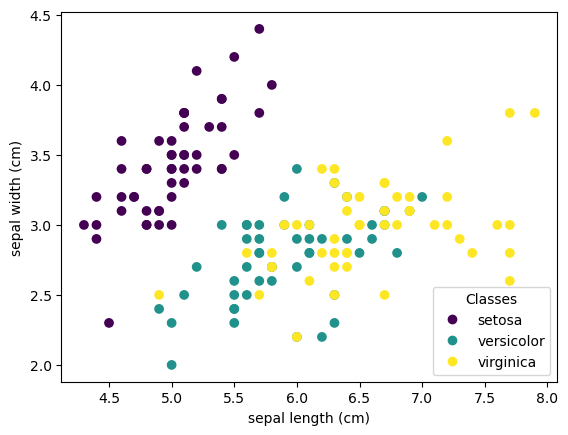

In [17]:
iris = datasets.load_iris()
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [ ]:
X = iris.data[:, :2]  # data of sepal length and width from iris dataset

In [11]:
# general multivariate gaussian
def gaussian(X, mu, cov):
    n = X.shape[1]
    C = 1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5)
    delta = (X - mu) @ np.linalg.inv(cov) @ (X - mu).T  # mahalanobis distance from mu to X
    return np.diagonal(C * np.exp(-0.5 * delta)).reshape(-1, 1)

### Step 1: Initialization
Initialize clusters using k-means

In [24]:
def initialize_clusters(X, k):
    clusters = []

    kmeans = KMeans(k).fit(X)
    mu_k = kmeans.cluster_centers_
    
    for i in range(k):
        clusters.append({
            'pi_k': 1.0 / k,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1])  # why initialize as identity?
        })
        
    return clusters

K = initialize_clusters(X, 3)

c:\Users\benak\anaconda3\envs\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Step 2: Expectation
Compute expected log-likelihood

In [25]:
def expectation(X, clusters):
    global gamma_nk, totals
    N = X.shape[0]
    K = len(clusters)
    totals = np.zeros((N, 1))
    gamma_nk = np.zeros((N, K))

    for k, cluster in enumerate(clusters):
        pi_k = cluster['pi_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
    
        gamma_nk[:, k] = (pi_k * gaussian(X, mu_k, cov_k)).ravel()  # numerator
    
    totals = np.sum(gamma_nk, 1)           # total probability per observation (i.e., p(x))
    gamma_nk /= np.expand_dims(totals, 1)  # divide each by p(x)

### Step 3: Maximization
MLE maximization of expected log-likelihood over the parameters

In [26]:
def maximization(X, clusters):
    global gamma_nk
    N = float(X.shape[0])

    for k, cluster in enumerate(clusters):
        gamma_k = np.expand_dims(gamma_nk[:, k], 1)
        N_k = np.sum(gamma_k, axis=0)  # sum of all gamma_k over N

        pi_k = N_k / N
        mu_k = np.sum(gamma_k * X, axis=0) / N_k
        cov_k = (gamma_k * (X - mu_k)).T @ (X - mu_k) / N_k

        cluster['pi_k'] = pi_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

In [28]:
def get_likelihood(X, clusters):
    global gamma_nk, totals
    sample_likelihoods = np.log(totals)      # log of sum over k
    likelihood = np.sum(sample_likelihoods)  # sum over n
    return likelihood, sample_likelihoods

Now we can run the algorithm:

In [29]:
def train_gmm(X, K, epochs):
    clusters = initialize_clusters(X, K)
    likelihoods = np.zeros((epochs, ))
    scores = np.zeros((X.shape[0], K))
    history = []

    for i in range(epochs):
        snapshot = []

        for cluster in clusters:
            snapshot.append({
                'mu_k': cluster['mu_k'].copy(),
                'cov_k': cluster['cov_k'].copy(),
            })

        history.append(snapshot)

        expectation(X, clusters)
        maximization(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood  # record the likelihood

    scores = np.log(gamma_nk)

    return clusters, likelihoods, scores, sample_likelihoods, history

In [31]:
K = 3
epochs = 50

clusters, likelihoods, scores, sample_likelihoods, history = train_gmm(X, K, epochs)

c:\Users\benak\anaconda3\envs\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


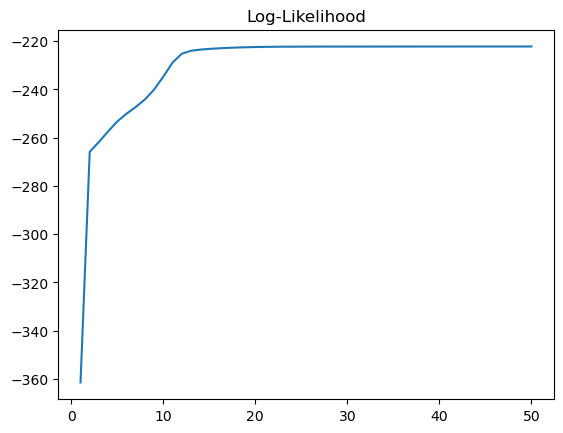

In [34]:
plt.title('Log-Likelihood')
plt.plot(np.arange(1, epochs + 1), likelihoods)
plt.show();     

Plotting the Gaussians:

In [38]:
from matplotlib import colors
def plot_clusters(X, history, scores):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    colorset = ['blue', 'red', 'black']
    
    for j, clusters in enumerate(history):
      
        idx = 0
      
        if j % 3 != 0:
            continue
        
        plt.cla()
        
        for cluster in clusters:
            mu = cluster['mu_k']
            cov = cluster['cov_k']

            eigenvalues, eigenvectors = np.linalg.eigh(cov)
            order = eigenvalues.argsort()[::-1]
            eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
            vx, vy = eigenvectors[:,0][0], eigenvectors[:,0][1]
            theta = np.arctan2(vy, vx)

            color = colors.to_rgba(colorset[idx])

            for cov_factor in range(1, 4):
                ell = Ellipse(
                        xy=mu, 
                        width=np.sqrt(eigenvalues[0]) * cov_factor * 2, 
                        height=np.sqrt(eigenvalues[1]) * cov_factor * 2, 
                        angle=np.degrees(theta), linewidth=2
                    )
                ell.set_facecolor((color[0], color[1], color[2], 1.0 / (cov_factor * 4.5)))
                ax.add_artist(ell)

            ax.scatter(cluster['mu_k'][0], cluster['mu_k'][1], c=colorset[idx], s=1000, marker='+')
            idx += 1

        for i in range(X.shape[0]):
            ax.scatter(X[i, 0], X[i, 1], c=colorset[np.argmax(scores[i])], marker='o')
        
        plt.legend();

## Resources

Code based on this notebook:
- https://github.com/ocontreras309/ML_Notebooks/blob/master/GMM_Implementation.ipynb

Write-Up:
- https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95